# read label

In [3]:
import pandas as pd

## bounding box

In [4]:
bbox_table = pd.read_csv('data/BBox_List_2017.csv')

In [5]:
bbox_table

,Image Index,Finding Label,Bbox [x,y,w,h],Unnamed: 6,Unnamed: 7,Unnamed: 8
0,00013118_008.png,Atelectasis,225.084746,547.019217,86.779661,79.186441,NaN,NaN,NaN
1,00014716_007.png,Atelectasis,686.101695,131.543498,185.491525,313.491525,NaN,NaN,NaN
2,00029817_009.png,Atelectasis,221.830508,317.053115,155.118644,216.949153,NaN,NaN,NaN
3,00014687_001.png,Atelectasis,726.237288,494.951420,141.016949,55.322034,NaN,NaN,NaN
4,00017877_001.png,Atelectasis,660.067797,569.780787,200.677966,78.101695,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
979,00029464_015.png,Atelectasis,198.940451,352.900747,615.537778,323.128889,NaN,NaN,NaN
980,00025769_001.png,Atelectasis,701.838229,572.491858,103.537778,63.715556,NaN,NaN,NaN
981,00016837_002.png,Atelectasis,140.913785,658.962969,271.928889,94.435556,NaN,NaN,NaN
982,00020124_003.png,Atelectasis,175.047118,580.456302,244.622222,103.537778,NaN,NaN,NaN


## 4 bbox values

In [6]:
bbox_table['Bbox [x']

0      225.084746
1      686.101695
2      221.830508
3      726.237288
4      660.067797
          ...    
979    198.940451
980    701.838229
981    140.913785
982    175.047118
983    343.438229
Name: Bbox [x, Length: 984, dtype: float64

In [7]:
bbox_table['y']

0      547.019217
1      131.543498
2      317.053115
3      494.951420
4      569.780787
          ...    
979    352.900747
980    572.491858
981    658.962969
982    580.456302
983    446.198524
Name: y, Length: 984, dtype: float64

In [8]:
bbox_table['w']

0       86.779661
1      185.491525
2      155.118644
3      141.016949
4      200.677966
          ...    
979    615.537778
980    103.537778
981    271.928889
982    244.622222
983    120.604444
Name: w, Length: 984, dtype: float64

In [9]:
bbox_table['h]']

0       79.186441
1      313.491525
2      216.949153
3       55.322034
4       78.101695
          ...    
979    323.128889
980     63.715556
981     94.435556
982    103.537778
983     53.475556
Name: h], Length: 984, dtype: float64

## check how many classes

In [10]:
set(bbox_table['Finding Label'])

{'Atelectasis',
 'Cardiomegaly',
 'Effusion',
 'Infiltrate',
 'Mass',
 'Nodule',
 'Pneumonia',
 'Pneumothorax'}

In [11]:
classes = list(set(bbox_table['Finding Label']))
classes

['Pneumonia',
 'Infiltrate',
 'Atelectasis',
 'Mass',
 'Pneumothorax',
 'Cardiomegaly',
 'Nodule',
 'Effusion']

# YOLO LABEL

<object-class> <x_center> <y_center> <width> <height>

where:
<x_center> <y_center> <width> <height> - float values relative to width and height of image, it can be equal from (0.0 to 1.0]

for example: <x> = <absolute_x> / <image_width> or <height> = <absolute_height> / <image_height>
    

atention: <x_center> <y_center> - are center of rectangle (are not top-left corner)

In [17]:
class_map = {}

for i, cname in enumerate(classes):
    class_map[cname] = i

class_map

{'Pneumonia': 0,
 'Infiltrate': 1,
 'Atelectasis': 2,
 'Mass': 3,
 'Pneumothorax': 4,
 'Cardiomegaly': 5,
 'Nodule': 6,
 'Effusion': 7}

In [55]:
# create yolo label

image_shape = 1024 # 1024 x 1024

for img_name in bbox_table['Image Index']:
    label = bbox_table[bbox_table['Image Index'] == img_name]
    # object class
    _class = class_map[list(label['Finding Label'])[0]]
    # x center
    # move x to right (+t, )
    # (0.0 to 1.0]
    relative_x = ( list(label['Bbox [x'])[0] + list(label['w'])[0]//2 ) / image_shape
    # y center
    # move y to down (, +t)
    # (0.0 to 1.0]
    relative_y = ( list(label['y'])[0] + list(label['h]'])[0]//2 ) / image_shape
    # width
    # (0.0 to 1.0]
    relative_w = list(label['w'])[0] / image_shape
    # height
    # (0.0 to 1.0]
    relative_h = list(label['h]'])[0] / image_shape
    
    # what yolo label looks like
    print('{} {} {} {} {}'.format(_class, relative_x, relative_y, relative_w, relative_h))
    

2 0.2618015095338984 0.5722843913708701 0.08474576271186436 0.07733050847457626
2 0.7598649364406778 0.2808041976670088 0.18114406779661033 0.30614406779661035
2 0.2918266684322031 0.4150909326844297 0.151483050847458 0.21186440677966115
2 0.777575476694915 0.5097181837437519 0.1377118644067793 0.054025423728813575
2 0.7422537076271182 0.5945124868619238 0.1959745762711865 0.07627118644067793
2 0.6094412076271182 0.5818171743619238 0.05508474576271182 0.17584745762711815
2 0.3223483845338984 0.6505252547183281 0.08156779661016952 0.05508474576271182
2 0.6143571239406778 0.6390547833200224 0.2648305084745762 0.15042372881355956
2 0.7083388506355928 0.5940501487861239 0.09639830508474581 0.1885593220338984
2 0.38711599576271194 0.5067553924301924 0.10275423728813574 0.09957627118644044
2 0.7284659692796611 0.34860192315053123 0.22245762711864453 0.20550847457627147
2 0.2157044491525424 0.5420771614979892 0.2987288135593223 0.1641949152542373
2 0.6553727489406778 0.45635483628612505 0.222

7 0.729127604166667 0.7191429477267793 0.29666666666666697 0.09888888888888868
7 0.2631987847222227 0.7183660380045577 0.2522222222222226 0.06111111111111113
7 0.19244357638888865 0.6179754130045576 0.03888888888888887 0.26
7 0.2802734375 0.664529232449002 0.31111111111111134 0.08444444444444442
7 0.6692925347222227 0.49156482272677926 0.24555555555555567 0.06444444444444443
7 0.47874565972222266 0.6414346143934463 0.6244444444444444 0.13
7 0.2622439236111114 0.5152410380045576 0.0733333333333333 0.15444444444444433
7 0.5231987847222226 0.5765865241156679 0.753333333333333 0.13555555555555568
7 0.2967664930555557 0.7035873921712236 0.23333333333333303 0.09777777777777735
7 0.2566319444444443 0.5705231560601133 0.23555555555555568 0.09555555555555557
7 0.7090972222222227 0.712107357449002 0.34444444444444433 0.12
7 0.7195920138888886 0.6440301005045577 0.19222222222222266 0.17333333333333303
7 0.7448871527777773 0.7055405171712236 0.3244444444444443 0.10222222222222264
7 0.306328125 0.5

3 0.35171234292328024 0.4446707589285713 0.14391534391534375 0.14814814814814845
3 0.3578166335978838 0.41519820601851853 0.1502645502645498 0.19365079365079396
3 0.39973958333333304 0.5288401124338623 0.13439153439153417 0.133333333333333
3 0.2558996775793652 0.5898706183862432 0.18306878306878321 0.29312169312169334
3 0.38582589285714264 0.6611214451058203 0.0867724867724868 0.08253968253968252
6 0.7114221643518516 0.34308345734126955 0.11957671957671973 0.14708994708994727
6 0.9036975033068779 0.7023943865740742 0.05185185185185186 0.057142857142857134
6 0.7492001488095235 0.6943369708994707 0.05079365079365079 0.04761904761904765
6 0.35945870535714264 0.7457837301587305 0.03492063492063496 0.032804232804232815
6 0.15635954034391503 0.5207857969576719 0.08359788359788359 0.09947089947089942
6 0.747083746693122 0.411307457010582 0.05079365079365079 0.06031746031746035
6 0.7067904679232803 0.3395130621693125 0.05291005291005293 0.05608465608465606
6 0.38672081679894144 0.5159784226190

1 0.7077083333333329 0.513656836615668 0.21888888888888866 0.13
2 0.3467083401150176 0.4618301561143662 0.09555555555555557 0.42888888888888865
2 0.5122335137261289 0.6004933505588105 0.643333333333333 0.07777777777777774
7 0.6521180555555557 0.574399024115668 0.20333333333333303 0.15222222222222265
2 0.3372204928927949 0.42824074639214454 0.2 0.12555555555555567
3 0.37517795138888865 0.3608703782823349 0.143333333333333 0.25
2 0.23832292344835057 0.5460792880588106 0.07111111111111112 0.028888888888888867
7 0.5582508680555557 0.5417123921712237 0.27555555555555566 0.25555555555555565
2 0.5546293470594619 0.6395905727810333 0.7211111111111114 0.17111111111111135
7 0.7955512152777773 0.6213955518934463 0.18666666666666698 0.05
2 0.7351935831705733 0.5893475172254775 0.10111111111111132 0.06222222222222227
7 0.2631987847222227 0.7183660380045577 0.2522222222222226 0.06111111111111113
3 0.4045355902777773 0.3435222880045576 0.10444444444444433 0.13222222222222266
2 0.39398264567057323 0.4

## show on image

In [32]:
# target image
image_name = bbox_table['Image Index'][500]

In [33]:
# label of the target image
label = bbox_table[bbox_table['Image Index'] == image_name]
label

,Image Index,Finding Label,Bbox [x,y,w,h],Unnamed: 6,Unnamed: 7,Unnamed: 8
500,00028285_014.png,Infiltrate,636.586667,396.269045,234.382222,360.675556,NaN,NaN,NaN
774,00028285_014.png,Pneumonia,660.480000,456.571267,210.488889,333.368889,NaN,NaN,NaN


In [34]:
print(list(label['Bbox [x'])[0])
print(list(label['y'])[0])
print(list(label['w'])[0])
print(list(label['h]'])[0])

636.586666666667
396.269045138889
234.382222222222
360.675555555556


In [35]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

In [36]:
img = cv2.imread('data/images/{}'.format(bbox_table['Image Index'][0]))

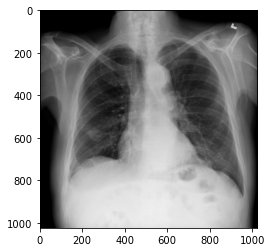

In [37]:
plt.imshow(img)

In [49]:
img.shape

(1024, 1024, 3)

In [38]:
##:                (xy)---------------+
##:                |                  |
##:              height               |
##:                |                  |
##:                +----- width ------+

In [39]:
label_color = ['red', 'blue', 'green', 'orange', 'cyan']

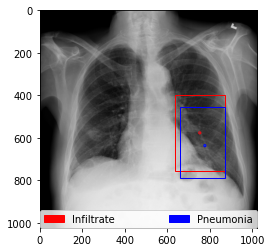

In [44]:
# add label bbox
plt.imshow(img)

ax = plt.gca()

_patches = []

# a image might have many labels
for i in range(len(list(label['y']))):
    rect = patches.Rectangle((list(label['Bbox [x'])[i], list(label['y'])[i]),
                            list(label['w'])[i], list(label['h]'])[i],
                            linewidth=1, edgecolor=label_color[i], fill=False )
    
    # plot center point of bbox
    cent = patches.Circle((list(label['Bbox [x'])[i] + list(label['w'])[0]//2,
                           list(label['y'])[i] + list(label['h]'])[0]//2 ),
                            radius = 5, edgecolor=label_color[i], fill=True )
    
    ax.add_patch(rect)
    ax.add_patch(cent)

    _patches.append(patches.Patch(color=label_color[i], label=list(label['Finding Label'])[i]))
    
plt.legend(handles=_patches, ncol=2, loc='lower left', mode='expand', borderaxespad=0.)

plt.show()

In [ ]:
# according to wiki
# A pulmonary infiltrate is a substance denser than air, such as pus, blood, or protein, which lingers within the parenchyma of the lungs.[1] 
# Pulmonary infiltrates are associated with pneumonia, and tuberculosis.